# 01 SRI per algorithm

In [1]:
import re
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the CSV files

In [2]:
raw_data = sqlContext.read.parquet('../data/sri/2019-09/reports/04_sri_per_hash/').toPandas()
raw_data

,algorithms,number
0,sha384,69284843
1,sha256,56800695
2,sha512,9311515
3,sha256+sha512,1299523
4,sha384+sha512,1002508
5,,683429
6,sha256+sha384+sha512,505319
7,sha256+sha384,33889
8,true,4978
9,+\n+sha384,2379


## Prepare the data

In [3]:
data = raw_data.copy()
data['percentage'] = data['number'] / data['number'].sum() * 100
data['algorithms'] = data['algorithms'].replace(data['algorithms'][5:6], 'empty')
data['algorithms'] = data['algorithms'].replace(data['algorithms'][8:], 'other')
data = data.groupby('algorithms').sum().sort_values(by=['percentage'], ascending=False)
data

,number,percentage
algorithms,,
sha384,69284843,49.860906
sha256,56800695,40.876676
sha512,9311515,6.701041
sha256+sha512,1299523,0.935203
sha384+sha512,1002508,0.721456
empty,683429,0.491830
sha256+sha384+sha512,505319,0.363653
other,34525,0.024846
sha256+sha384,33889,0.024388


## Plot the data

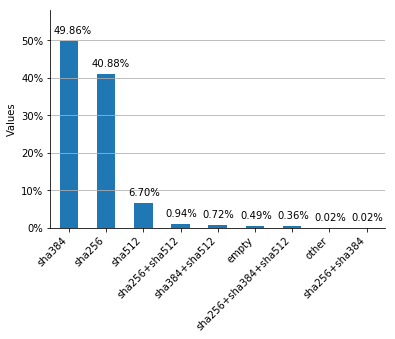

In [15]:
fig, ax = plt.subplots(1, 1)

data['percentage'].plot.bar(ax=ax, sharex=True, rot='xticks')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

for i, v in enumerate(data['percentage']):
    ax.text(i-0.4, v + 2, '{:.2f}%'.format(v))

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])
    

plt.xlim(-0.5,8.5)
plt.ylim(0,58)

plt.xlabel('')
plt.ylabel('Values')

plt.xticks(rotation=45,  ha="right")

plt.savefig('04_sri_per_algorithm.pdf', bbox_inches='tight')